https://www.youtube.com/watch?v=iIkJrwVUl1c&t=3855s

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('data.csv')

In [6]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CBFB0F0080>,
      dtype=object)

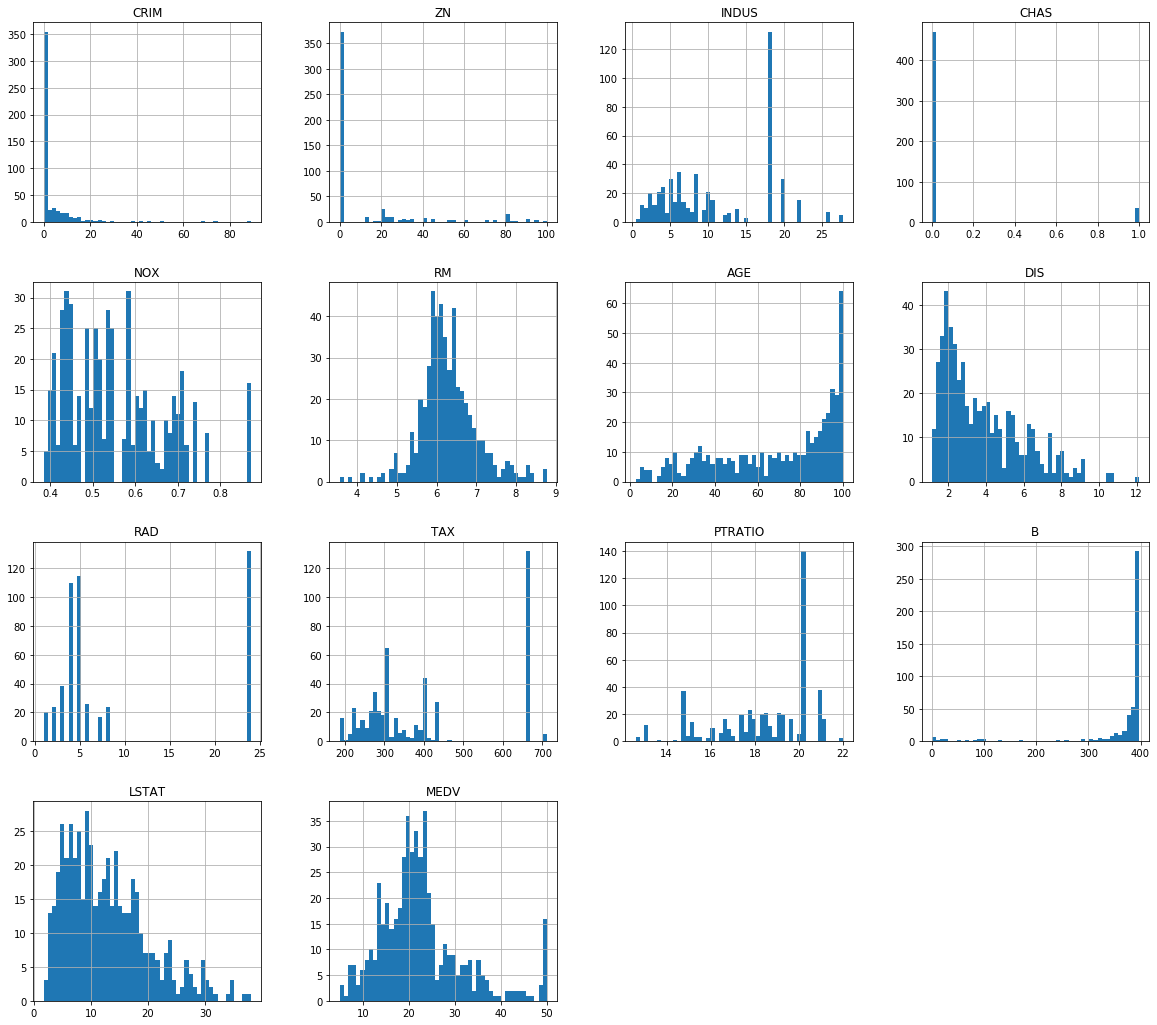

In [3]:
df.hist(bins=50,figsize=(20,18))

In [4]:
df.shape

(506, 14)

In [7]:
def split_train_test(data,test_ratio):
    np.random.seed(42)
    shuffled = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [8]:
train_data, test_data = split_train_test(df,0.2)

In [9]:
print(train_data.shape)
print(test_data.shape)

(405, 14)
(101, 14)


In [5]:
from sklearn.model_selection import train_test_split

In [9]:
train_set, test_set = train_test_split(df,test_size=0.2,random_state=42)

In [10]:
print(train_set.shape)
print(test_set.shape)

(404, 14)
(102, 14)


In [10]:
# Taking this Feature as an Example
# This feature has two unique values i.e. 0,1
# So when we split, it might happn that test data or train daita does not contain both 0 and 1
# To rectify this we use Stratified Shuffle Split
df['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [1]:
from sklearn.model_selection import StratifiedShuffleSplit

In [2]:
spl = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)

for train_index,test_index in spl.split(df,df['CHAS']):
    strat_train_set = df.iloc[train_index]
    strat_test_set = df.iloc[test_index]

NameError: name 'df' is not defined

In [22]:
print(strat_train_set.shape)
print(strat_test_set.shape)

(404, 14)
(102, 14)


In [14]:
# Ratio of 0's an 1's in both Train and Test sets is almost equal 
# due to Stratified ShuffleSplit

In [23]:
print(95/7)
strat_test_set['CHAS'].value_counts()

13.571428571428571


0    95
1     7
Name: CHAS, dtype: int64

In [24]:
print(376/28)
strat_train_set['CHAS'].value_counts()

13.428571428571429


0    376
1     28
Name: CHAS, dtype: int64

In [26]:
housing = strat_train_set.copy()

# Looking for Correlations

In [27]:
# corr() function is a method of pandas
# Value 1 is highest and indicates strong positive correlation
# Value -1 is lowest and indicates strong negative correlation
corr_matrix = housing.corr()

In [28]:
print(corr_matrix.shape)
corr_matrix

(14, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.212927,0.416640,-0.061482,0.430879,-0.257663,0.361890,-0.386900,0.648221,0.603934,0.305603,-0.486869,0.471442,-0.393715
ZN,-0.212927,1.000000,-0.542161,-0.023536,-0.509327,0.292252,-0.565680,0.666939,-0.306480,-0.322803,-0.390570,0.188575,-0.420097,0.339741
INDUS,0.416640,-0.542161,1.000000,0.043686,0.759051,-0.385324,0.644114,-0.708612,0.580908,0.716288,0.384465,-0.368685,0.611068,-0.473516
CHAS,-0.061482,-0.023536,0.043686,1.000000,0.077490,0.100385,0.058388,-0.088081,-0.023005,-0.048802,-0.132682,0.048275,-0.077592,0.205066
NOX,0.430879,-0.509327,0.759051,0.077490,1.000000,-0.300860,0.727358,-0.763623,0.596012,0.659049,0.164977,-0.408434,0.602386,-0.422873
RM,-0.257663,0.292252,-0.385324,0.100385,-0.300860,1.000000,-0.241318,0.204159,-0.200095,-0.282449,-0.331544,0.122472,-0.603006,0.680857
AGE,0.361890,-0.565680,0.644114,0.058388,0.727358,-0.241318,1.000000,-0.734827,0.449489,0.501491,0.259633,-0.287900,0.599211,-0.364596
DIS,-0.386900,0.666939,-0.708612,-0.088081,-0.763623,0.204159,-0.734827,1.000000,-0.481556,-0.530840,-0.215173,0.309222,-0.501408,0.240451
RAD,0.648221,-0.306480,0.580908,-0.023005,0.596012,-0.200095,0.449489,-0.481556,1.000000,0.910932,0.471912,-0.490951,0.479857,-0.374693
TAX,0.603934,-0.322803,0.716288,-0.048802,0.659049,-0.282449,0.501491,-0.530840,0.910932,1.000000,0.473026,-0.475293,0.534228,-0.456657


In [29]:
# MEDV is price of house
# MEDV Correlation w.r.t. RM(no of rooms) is high
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.680857
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

In [30]:
from pandas.plotting import scatter_matrix

In [22]:
attributes = ['MEDV', 'RM', 'ZN', 'LSTAT']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026C3BB7AC50>,
      dtype=object)

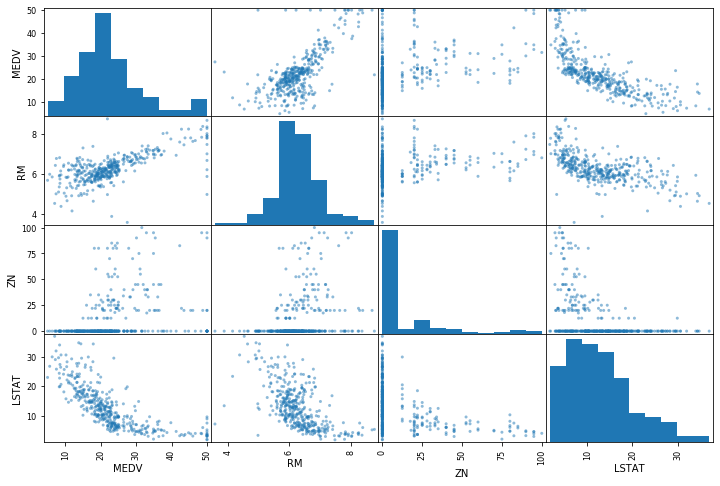

In [23]:
scatter_matrix(housing[attributes], figsize=(12,8))

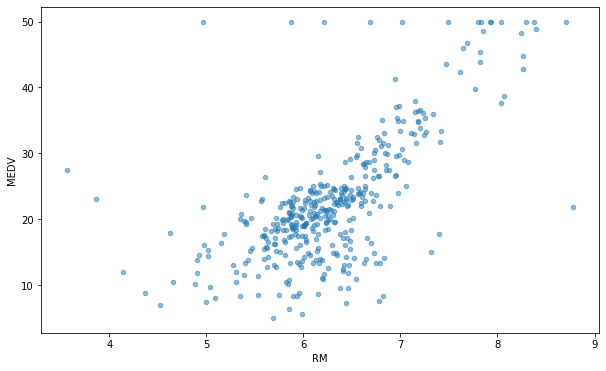

In [31]:
# Positive Correlation
housing.plot(kind='scatter',x='RM',y='MEDV',alpha=0.5, figsize=(10,6))
# Alpha parameter will increase intesity wher point is high

# Trying out Attribute Combinations

In [32]:
housing['tax_per_room'] = housing['TAX']/housing['RM']

In [33]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV            1.000000
RM              0.680857
B               0.361761
ZN              0.339741
DIS             0.240451
CHAS            0.205066
AGE            -0.364596
RAD            -0.374693
CRIM           -0.393715
NOX            -0.422873
TAX            -0.456657
INDUS          -0.473516
PTRATIO        -0.493534
tax_per_room   -0.528626
LSTAT          -0.740494
Name: MEDV, dtype: float64

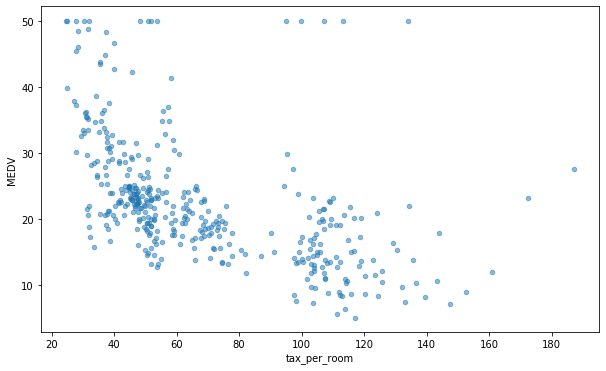

In [34]:
# Negative Correlation
housing.plot(kind='scatter',x='tax_per_room',y='MEDV',alpha=0.5, figsize=(10,6))

# Missing Attributes

In [35]:
# From count we see that RM has 5 missing points
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,tax_per_room
count,404.000000,404.000000,404.000000,404.000000,404.000000,399.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,399.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.279481,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609,22.509406,67.696004
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.716784,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740,9.385531,31.577122
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000,5.000000,24.645639
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.876500,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500,16.600000,44.910026
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.209000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000,21.150000,54.831220
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630500,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500,25.000000,98.673976
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000,50.000000,187.026116


### Rectification Options of missing Datapoints
##### 1) Get rid of missing Data points
##### 2) Get rid of the whole attribute (it can be confirmed if the attr has no correlation)
##### 3) Set the missing value to some value (0, mean, median)

In [29]:
# Option 1
a = housing.dropna(subset=["RM"])

In [30]:
a.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,tax_per_room
count,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000
mean,3.645234,10.878446,11.377494,0.070175,0.558678,6.279481,68.968421,3.734774,9.796992,413.531328,18.470927,352.880201,12.781654,22.544862,67.696004
std,8.141128,22.257959,6.873014,0.255763,0.117254,0.716784,28.340100,2.095701,8.765590,169.252342,2.130576,96.560412,7.264001,9.431417,31.577122
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000,5.000000,24.645639
25%,0.086855,0.000000,5.255000,0.000000,0.453000,5.876500,44.700000,2.016250,4.000000,284.000000,17.400000,374.045000,6.765000,16.600000,44.910026
50%,0.289600,0.000000,9.900000,0.000000,0.538000,6.209000,78.300000,3.102500,5.000000,345.000000,19.000000,390.940000,11.640000,21.200000,54.831220
75%,3.937625,12.500000,18.100000,0.000000,0.631000,6.630500,94.050000,5.057250,24.000000,666.000000,20.200000,395.630000,17.105000,25.000000,98.673976
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000,50.000000,187.026116


In [31]:
# Option 2
b = housing.drop('RM', axis=1)

In [32]:
b.describe()

,CRIM,ZN,INDUS,CHAS,NOX,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,tax_per_room
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,399.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609,22.509406,67.696004
std,8.099383,22.150636,6.877817,0.254290,0.116875,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740,9.385531,31.577122
min,0.006320,0.000000,0.740000,0.000000,0.389000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000,5.000000,24.645639
25%,0.086963,0.000000,5.190000,0.000000,0.453000,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500,16.600000,44.910026
50%,0.286735,0.000000,9.900000,0.000000,0.538000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000,21.150000,54.831220
75%,3.731923,12.500000,18.100000,0.000000,0.631000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500,25.000000,98.673976
max,73.534100,100.000000,27.740000,1.000000,0.871000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000,50.000000,187.026116


In [33]:
# Option 3
median = housing['RM'].median()
c =housing['RM'].fillna(median)

### Imputation of missing values
#### This will fill values automatically if there are missing data in any of the columns

In [36]:
from sklearn.impute import SimpleImputer

In [37]:
imputer = SimpleImputer(strategy = 'median')
imputer.fit(housing)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [38]:
# Medians for all 15 columns
imputer.statistics_

array([2.86735000e-01, 0.00000000e+00, 9.90000000e+00, 0.00000000e+00,
       5.38000000e-01, 6.20900000e+00, 7.82000000e+01, 3.12220000e+00,
       5.00000000e+00, 3.37000000e+02, 1.90000000e+01, 3.90955000e+02,
       1.15700000e+01, 2.11500000e+01, 5.48312199e+01])

In [39]:
X = imputer.transform(housing) # It is an array

In [41]:
X.shape

(404, 15)

In [42]:
housing_tr = pd.DataFrame(X,columns=housing.columns)

In [43]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,tax_per_room
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.278609,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609,22.509406,67.536786
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.712366,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740,9.385531,31.412918
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000,5.000000,24.645639
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500,16.600000,45.017395
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.209000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000,21.150000,54.831220
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500,25.000000,98.317507
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000,50.000000,187.026116


# Scikit Learn Design

This libraray has primarily 3 types of objects

1) **Estimators** -- It estimes some parameter based on dataset e.g Imputer. It also has Fit method, that fits the dataset and calculates internal parameters


2) **Transformers** --  Transform method takes input and returns output based on the learnings from fit(). It also has a convenience function fit_transform() which fits and then transforms. fit_transform() is considered to be faster than fit() and transform().

3) **Predictors** -- LinearRegression model is an example of predictor. fit() and predict() are two common functions. It also gives score() function which will evaluate the predictions

# Feature Scalling
1. **MinMax Scalling** (Normalization) = (Value - Min)/(Max - Min)
    
    Scikit Learn provides a class called MinMaxScaler



2. **Standardization** = (Value - Mean)/std
    
    Scikit Learn provides a class called StandardScaler

# Create a Pipeline for Data input and output 

In [44]:
housing_features = strat_train_set.drop('MEDV', axis=1)
housing_labels = strat_train_set['MEDV'].copy()

In [45]:
from sklearn.pipeline import Pipeline

In [46]:
from sklearn.preprocessing import StandardScaler

In [48]:
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = 'median')),
### ....... You can add as many pipelines as you want    
    ('std_scaler', StandardScaler()),
])

In [49]:
# Pipeline will be implemented as per defined order above
housing_num_tr = my_pipeline.fit_transform(housing_features)

In [50]:
type(housing_num_tr) # It is a Numpy Array

numpy.ndarray

In [51]:
housing_num_tr.shape

(404, 13)

# Select a desired Model

## Linear Regression 

In [52]:
housing_features = strat_train_set.drop('MEDV', axis=1)
housing_labels = strat_train_set['MEDV'].copy()

In [53]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(housing_num_tr,housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [54]:
some_data = housing_features.iloc[:5]

In [55]:
some_labels = housing_labels.iloc[:5]

In [56]:
prepared_data = my_pipeline.transform(some_data)

In [120]:
model.predict(prepared_data)  # Will return array of predictions

array([23.99866812, 27.25283558, 20.5818147 , 25.04908672, 23.77464206])

In [121]:
list(some_labels)  # Actual labels

[21.9, 24.5, 16.7, 23.1, 23.0]

#### Evaluating the Linear Regression Model

In [57]:
from sklearn.metrics import mean_squared_error

In [58]:
housing_predictions = model.predict(housing_num_tr)

In [59]:
# Calculate Mean Sqaured Error for linear Regression
# We will not use Linear Regression because RMSE is high

lin_mse = mean_squared_error(housing_labels,housing_predictions)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

4.835301058716238


## Decision Tree Regressor

In [60]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(housing_num_tr,housing_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [61]:
some_data = housing_features.iloc[:5]

In [62]:
some_labels = housing_labels.iloc[:5]

In [63]:
prepared_data = my_pipeline.transform(some_data)

In [64]:
model.predict(prepared_data)  # Will return array of predictions

array([21.9, 24.5, 16.7, 23.1, 23. ])

In [65]:
list(some_labels)  # Actual labels

[21.9, 24.5, 16.7, 23.1, 23.0]

#### Evaluating the Decision Tree Regressor Model

In [66]:
from sklearn.metrics import mean_squared_error

In [67]:
housing_predictions = model.predict(housing_num_tr)

In [68]:
# Calculate Mean Sqaured Error for Decision Tree
# Error is 0 not because model is perfect but because data is overfitted on the model

mse = mean_squared_error(housing_labels,housing_predictions)
rmse = np.sqrt(mse)
print(rmse)

0.0


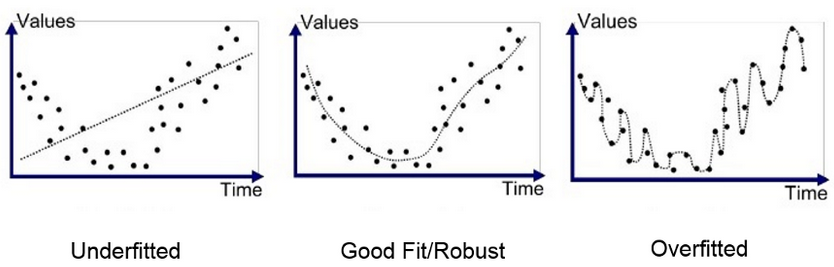

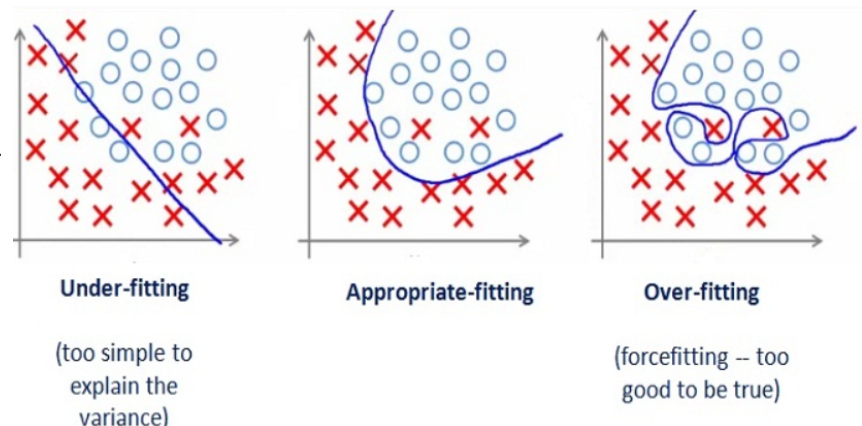

## Random Forest Regressor

In [69]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(housing_num_tr,housing_labels)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [70]:
some_data = housing_features.iloc[:5]

In [71]:
some_labels = housing_labels.iloc[:5]

In [72]:
prepared_data = my_pipeline.transform(some_data)

In [73]:
model.predict(prepared_data)  # Will return array of predictions

array([23.  , 25.54, 15.49, 23.94, 23.52])

In [74]:
list(some_labels)  # Actual labels

[21.9, 24.5, 16.7, 23.1, 23.0]

#### Evaluating the Random Forest Regressor Model

In [78]:
from sklearn.metrics import mean_squared_error

In [79]:
housing_predictions = model.predict(housing_num_tr)

In [80]:
# Calculate Mean Sqaured Error for Random Forest
# Error is 0 not because model is perfect but because data is overfitted on the model

mse = mean_squared_error(housing_labels,housing_predictions)
rmse = np.sqrt(mse)
print(rmse)

1.3126770507645666


# Using Better Evaluation Technique -- Cross Validation

### Linear Regression

In [125]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,housing_num_tr,housing_labels,
                         scoring='neg_mean_squared_error', cv=10)
rmse_scores_lin = np.sqrt(-scores)

In [126]:
print(rmse_scores_lin) # Linear Regression

[4.22235612 4.26438649 5.09424333 3.83081183 5.37600331 4.41092152
 7.47272243 5.48554135 4.14606627 6.0717752 ]


### Decision Tree Regressor

In [136]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,housing_num_tr,housing_labels,
                         scoring='neg_mean_squared_error', cv=10)
rmse_scores_dt = np.sqrt(-scores)

In [137]:
print(rmse_scores_dt) # Decision Tree Regressor

[3.7422766  5.69272107 5.0492936  3.76456521 4.15228853 2.74877245
 4.32140024 3.69861461 3.46417378 4.34562999]


### Random Forest Regressor

In [81]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,housing_num_tr,housing_labels,
                         scoring='neg_mean_squared_error', cv=10)
rmse_scores_rf = np.sqrt(-scores)

In [82]:
print(rmse_scores_rf) # Decision Tree Regressor

[2.82629897 3.22862577 4.52736638 2.65736528 3.62977203 2.84145825
 6.13355158 3.28613108 3.49808698 3.71007513]


### Average and Standard Deviation of Scores

#### Random Forest Regressor Model has best Avg and Std Deveation of  Scores

In [153]:
print("RMSE of Linear Regression Model: Avg={} and Std Dev={}".format(rmse_scores_lin.mean(),rmse_scores_lin.std()))

RMSE of Linear Regression Model: Avg=5.037482786117751 and Std Dev=1.0594382405606948


In [154]:
print("RMSE of Decision Tree Regressor Model: Avg={} and Std Dev={}".format(rmse_scores_dt.mean(),rmse_scores_dt.std()))

RMSE of Decision Tree Regressor Model: Avg=4.097973607033387 and Std Dev=0.7862345420306639


In [167]:
print("RMSE of Random Forest Regressor Model: Avg={} and Std Dev={}".format(rmse_scores_rf.mean(),rmse_scores_rf.std()))

RMSE of Random Forest Regressor Model: Avg=3.5003591877732254 and Std Dev=0.8875731068403335


# Saving the Model

In [168]:
# Do this once Model is run with Selectcted Model type
from joblib import dump,load
dump(model,'Dragon.joblib')

['Dragon.joblib']

# Testing the Model on Test dataset

In [169]:
X_test = strat_test_set.drop('MEDV',axis=1)
Y_test = strat_test_set['MEDV'].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test,final_predictions)
final_rmse = np.sqrt(final_mse)
print(final_rmse)

3.2613745147545066


# Using the Model with Some Future Values
## We can create a trained model file via joblib and then use the file in another .py file as illustared below

In [175]:
from joblib import dump, load
import numpy as np
model = load('Dragon.joblib') 
features = np.array([[-0.44228927, -0.4898311 , -1.37640684, -0.27288841, -0.34321545,
        0.36738857, -0.33092752,  1.20235683, -1.0016859 ,  0.05733231,
       -1.21003475,  0.38110555, -0.57309194]])
model.predict(features)

array([25.66])